# Install Dependencies & Import

In [19]:
%pip install git+https://github.com/openai/whisper.git
%pip install torchaudio

  Cloning https://github.com/openai/whisper.git to /private/var/folders/py/bg01sqvn7sg74g1d70cyr8d40000gn/T/pip-req-build-8vfp5ksg
  Running command git clone --filter=blob:none --quiet https://github.com/openai/whisper.git /private/var/folders/py/bg01sqvn7sg74g1d70cyr8d40000gn/T/pip-req-build-8vfp5ksg
  Resolved https://github.com/openai/whisper.git to commit 6dea21fd7f7253bfe450f1e2512a0fe47ee2d258
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 1.5 MB/s eta 0:00:0000:0100:010m
Note: you may need to restart the kernel to use updated packages.


In [20]:
#imports
import os
import re
import string
import numpy as np
import whisper

# Load model and dataset

Load model (OpenAI Whisper):

In [21]:
# model
# replace with model here later
model = whisper.load_model("base")

Load dataset (LibriTTS):

In [30]:
import torch
import torchaudio

data = torchaudio.datasets.LIBRITTS(root="data", url="train-clean-100", download=True)

100%|██████████| 7.19G/7.19G [32:40<00:00, 3.94MB/s]  


In [31]:
data_loader = torch.utils.data.DataLoader(data, batch_size=1, shuffle=True)

# Convert audio to spectrogram

In [57]:
%pip install scipy matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 10.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 14.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.7/229.7 kB 12.2 MB/s eta 0:00:00
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 17.3 MB/s eta 0:00:00a 0:00:01
  Using cached kiwisolver-1.4.4-cp310-cp310-macosx_11_0_arm64.whl (63 kB)
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)
Note: you may need to restart the kernel to use updated packages.


First, visualize the plain waveform for a particular audio file:

Speaker ID: 1034
Chapter ID: 121119
Utterance ID: 1034_121119_000019_000001
Original text: Your name?"
Normalized text: Your name?"

Waveform shape: torch.Size([1, 17520])
Waveform shape (squeezed): torch.Size([17520])
Sample rate: 24000 Hz


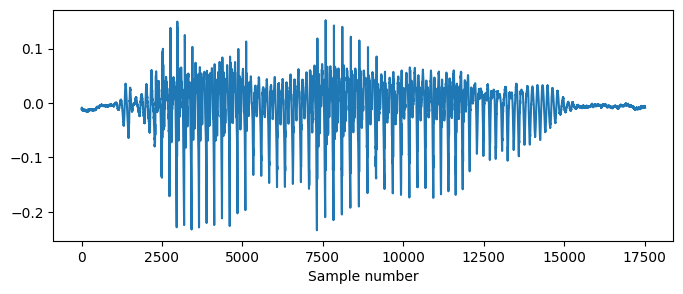

In [126]:
import scipy
import matplotlib.pyplot as plt

item = data[7]
waveform, sample_rate, original_text, normalized_text, speaker_id, chapter_id, utterance_id = item

print(f"Speaker ID: {speaker_id}")
print(f"Chapter ID: {chapter_id}")
print(f"Utterance ID: {utterance_id}")
print(f"Original text: {original_text}")
print(f"Normalized text: {normalized_text}")
print()
print(f"Waveform shape: {waveform.shape}")
print(f"Waveform shape (squeezed): {waveform.squeeze().shape}")
print(f"Sample rate: {sample_rate} Hz")

plt.figure(figsize=(8,3))
plt.plot(waveform.t().numpy())
plt.xlabel("Sample number")
plt.show()

Then, generate a spectrogram and render it:

(129,) float64
(78,) float64
(129, 78) float32


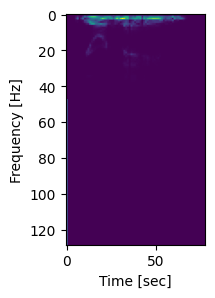

In [127]:
frequencies, times, spectrogram = scipy.signal.spectrogram(waveform.squeeze(), sample_rate)

print(frequencies.shape, frequencies.dtype)
print(times.shape, times.dtype)
print(spectrogram.shape, spectrogram.dtype)

plt.figure(figsize=(8,3))
plt.pcolormesh(times, frequencies, spectrogram)
plt.imshow(spectrogram)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

# Transcribe audio using model

In [10]:
# transcribe audios using model

dir = 'audio'

transcripts = {}

for filename in os.listdir(dir):
  name = os.path.join(dir, filename)

  if os.path.isfile(name):
     if filename.endswith('.wav'):
       result = model.transcribe(name)
       id = filename.split('.')[0]
       transcripts[id] = result['text']

/Users/pulljosh/Code/speech-recognition/.conda/lib/python3.10/site-packages/whisper/transcribe.py:114: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")
/Users/pulljosh/Code/speech-recognition/.conda/lib/python3.10/site-packages/whisper/transcribe.py:114: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")
/Users/pulljosh/Code/speech-recognition/.conda/lib/python3.10/site-packages/whisper/transcribe.py:114: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")
/Users/pulljosh/Code/speech-recognition/.conda/lib/python3.10/site-packages/whisper/transcribe.py:114: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")
/Users/pulljosh/Code/speech-recognition/.conda/lib/python3.10/site-p

In [11]:
transcripts

{'84_121123_000009_000000': ' But in less than five minutes, the staircase groaned beneath an extraordinary weight.',
 '84_121123_000010_000000': ' Villafort drew back and looked with astonishment on the young man, who almost a stranger to him called Nwatiya his father.',
 'test1': " He's fit to hear what's said here.",
 '84_121123_000009_000007': ' See what they have done? Cride Morrell with one hand leaning on the back of the chair and the other extending towards Valentine.',
 '84_121123_000008_000004': ' Go! Do you hear?" said Villafort, while Davenie advanced to lead Moral out.',
 '84_121123_000008_000003': ' Who are you, sir?" he asked. That forget that this is not the manner to enter a house stricken with death? Go, sir! Go! But Morale remained motionless. He could not detach his eyes from that disordered bed and the pale corpse of the young girl who was lying on it.',
 '84_121123_000008_000002': ' His glance at first wandering fixed itself upon Moral.',
 '84_121123_000008_000000

# Measure accuracy

In [12]:
# organize ground truths
ground_truths = {}

for filename in os.listdir(dir):
  name = os.path.join(dir, filename)

  if os.path.isfile(name):
    if filename.endswith('.txt') and 'original' in filename:
      id = filename.split('.')[0]
      
      with open(name) as txt:
        ground_truths[id] = txt.read()

In [13]:
ground_truths

{'84_121123_000008_000002': 'His glance, at first wandering, fixed itself upon Morrel.',
 '84_121123_000008_000003': '"Who are you, sir," he asked, "that forget that this is not the manner to enter a house stricken with death? Go, sir, go!" But Morrel remained motionless; he could not detach his eyes from that disordered bed, and the pale corpse of the young girl who was lying on it.',
 '84_121123_000008_000004': '"Go!--do you hear?" said Villefort, while d\'Avrigny advanced to lead Morrel out.',
 '84_121123_000009_000008': '"See, my father, see!"',
 '84_121123_000007_000001': 'Maximilian.',
 '84_121123_000008_000001': 'The terrible office he had held for twenty-five years had succeeded in making him more or less than man.',
 '84_121123_000009_000007': '"See what they have done!" cried Morrel, with one hand leaning on the back of the chair, and the other extended towards Valentine.',
 '84_121123_000009_000000': 'But in less than five minutes the staircase groaned beneath an extraordina

In [15]:
# Calculate number of correct transcripts
success = 0
for key, text in transcripts.items():
  truth = ground_truths[key]
  truth_seq = re.sub('['+string.punctuation+']', '', truth).split()
  seq = re.sub('['+string.punctuation+']','',text).split()
  print(truth_seq)
  print(seq)
  if truth_seq == seq:
    success += 1

['But', 'in', 'less', 'than', 'five', 'minutes', 'the', 'staircase', 'groaned', 'beneath', 'an', 'extraordinary', 'weight']
['But', 'in', 'less', 'than', 'five', 'minutes', 'the', 'staircase', 'groaned', 'beneath', 'an', 'extraordinary', 'weight']
['Villefort', 'drew', 'back', 'and', 'looked', 'with', 'astonishment', 'on', 'the', 'young', 'man', 'who', 'almost', 'a', 'stranger', 'to', 'him', 'called', 'Noirtier', 'his', 'father']
['Villafort', 'drew', 'back', 'and', 'looked', 'with', 'astonishment', 'on', 'the', 'young', 'man', 'who', 'almost', 'a', 'stranger', 'to', 'him', 'called', 'Nwatiya', 'his', 'father']


KeyError: 'test1'

In [17]:
# Calculate accuracy
accuracy = success / len(ground_truths.keys())
print(accuracy)

0.1


### Notes
- Evaluation is hard. What about slight differences?
- Ground truths are possibly noisy.